In [2]:
from simen_funksjoner import *
from read_csv import *

In [9]:
stores_gk_impuded.corr().to_csv("corr.csv", index = False)

In [23]:
h2o.init(ip ='localhost', port = 54321)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,20 mins 19 secs
H2O_cluster_timezone:,Europe/Oslo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_simenvoldqvam_0kgg8n
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.800 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [24]:
stores_income_trans_train = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/train_data/income_trans_train.csv")
stores_income_trans_test = h2o.import_file("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/train_data/income_trans_test.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [27]:
train_df

store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue,grunnkrets_name,district_name,municipality_name,area_km2,pt_all_households,pt_singles,pt_couple_without_children,pt_couple_with_children,pt_other_households,pt_single_parent_with_children,rev_yeo
983540538-974187930-44774,2016,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6.0203e+06,BRAGERNES TORG 13,59.7431,10.2049,MCDONALDS,Magasinet Drammen,17.998,Bragernes sentrum 3,Bragernes sentrum,Drammen,0.155779,-0.756455,-0.150764,0.882403,0.471944,-0.392788,-0.519425,1.29766
987074191-973117734-44755,2016,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3.01031e+06,nan,59.9138,10.734,MCDONALDS,nan,23.828,Sentrum 3 /rode 6,Sentrum 3,Oslo,0.264278,-1.04425,0.602438,1.05017,0.245811,-0.917347,0.208998,1.47939
984890265-981157303-64491,2016,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6.0501e+06,KONG RINGS GATE 1,60.1648,10.2547,BURGER KING,Kuben Hønefoss,16.099,Sydsiden 2,Hønefoss,Ringerike,0.160152,-1.37779,-1.26987,-0.403895,-0.682092,-0.686667,-0.846643,1.22241
914057442-992924179-126912,2016,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,1.80401e+07,STORGATA 12,67.2837,14.3798,BURGER KING,Glasshuspassasjen,9.296,Sentrum 1,Sentrum,Bodø,0.095029,-0.81245,0.542514,-0.204873,-0.663141,-0.251084,-0.728369,0.827876
913018583-913063538-668469,2016,BURGER KING TILLERTORGET,1.1.1.0,Hamburger restaurants,1.60174e+07,nan,63.3581,10.3748,BURGER KING,Tillertorget,4.528,Tiller-Hårstad 14,Tiller-Hårstad,Trondheim,0.25107,1.65828,0.66658,0.344563,0.0810007,0.486103,0.457116,0.262912
998035295-979540094-54657,2016,BURGER KING STAVANGER,1.1.1.0,Hamburger restaurants,1.10305e+07,TORGET 7,58.9702,5.73173,BURGER KING,nan,12.02,Sentrum vest 1,Bergjeland,Stavanger,0.0921636,-0.865133,0.75627,-0.157314,0.0372646,-0.498327,0.341171,1.01727
916757433-916772262-822439,2016,BURGER KING NARVIK,1.1.1.0,Hamburger restaurants,1.80507e+07,BOLAGSGATA 1,68.438,17.4229,BURGER KING,Amfi Narvik,7.622,Stormyra,Frydenlund,Narvik,0.235975,-0.611243,-0.133445,0.0356561,0.107286,0.664679,0.339609,0.676392
913158733-913203305-675470,2016,GRENSEN BURGERBAR,1.1.1.0,Hamburger restaurants,1.0103e+06,OLAV VS GATE 1,59.1192,11.3896,nan,nan,3.64,Sydsiden,Halden syd,Halden,1.50609,-0.245381,-0.834534,-0.562479,-0.477495,-0.00190052,-0.56941,0.0856618
982174139-982239737-14482,2016,MCDONALD'S ÅSANE SENTER,1.1.1.0,Hamburger restaurants,1.20109e+07,ÅSANE SENTER 37,60.4651,5.3241,MCDONALDS,Åsane Storsenter,30.514,Blokkhaugen,Åsane,Bergen,0.338197,0.864556,0.675127,0.16599,0.155559,0.282647,0.596046,1.63045
916217153-911834553-435311,2016,BERGBYS NOTODDEN,1.1.1.0,Hamburger restaurants,8.0703e+06,NESØYA,59.5591,9.24938,BERGBYS,nan,6.339,Tinnes 1,Notodden vest,Notodden,0.503609,-0.860333,-1.30519,-0.923235,-0.780724,-0.97942,-0.565008,0.532309


In [28]:
drop_list = ["year", "store_name", "area_km2", "revenue"]
drop_list2 = ["year", "store_name", "area_km2"]

x_train = train_df.drop(drop_list, axis = 1)
y_test = stores_income_trans_test.drop(drop_list2, axis = 1)


In [29]:
y_test

store_id,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name,grunnkrets_name,district_name,municipality_name,pt_all_households,pt_singles,pt_couple_without_children,pt_couple_with_children,pt_other_households,pt_single_parent_with_children
914206820-914239427-717245,1.1.1.0,Hamburger restaurants,3.0127e+06,STRØMSVEIEN 25 A,59.9087,10.787,,,Vålerenga rode 4,Vålerenga,Oslo,-0.917971,5.00711e-14,0.726684,0.227591,-0.75475,-0.00407002
916789157-916823770-824309,1.1.1.0,Hamburger restaurants,8.0614e+06,MYREN 1,59.2015,9.58824,BURGER KING,,Kjempa,Gulset,Skien,0.142793,-2.28151e-14,-0.304843,-0.412562,-0.143958,-0.192384
913341082-977479363-2948,1.1.1.0,Hamburger restaurants,3.01392e+06,STOVNER SENTER 3,59.9621,10.9245,BURGER KING,Stovner Senter,Stovner senter,Fossum,Oslo,-0.121398,-3.41949e-14,-0.579821,-0.722421,0.000141706,-0.124777
889682582-889697172-28720,1.1.1.0,Hamburger restaurants,1.60121e+07,TUNGASLETTA 16,63.4208,10.4611,BURGER KING,,Strindheim 4,Strindheim,Trondheim,0.385454,4.65739e-14,-2.83965e-05,0.65274,0.311366,0.445661
997991699-998006945-417222,1.1.1.0,Hamburger restaurants,3.01430e+06,AUD SCHØNEMANNS VEI 15,59.9211,10.7851,VULKAN BURGERBAR,,Lille Tøyen,Hasle,Oslo,0.30333,1.36613e-13,1.4657,0.373457,-0.134896,0.26812
914931487-815162862-756427,1.1.1.0,Hamburger restaurants,3.01310e+06,EKEBERGVEIEN 235,59.8611,10.7999,BURGER KING,,Bråten,Nordstrand,Oslo,1.90141,7.66054e-14,2.37343,2.493,1.61475,1.27569
967062979-972338656-6209,1.1.1.0,Hamburger restaurants,1.60112e+07,KONGENS GATE 9,63.4304,10.3937,MCDONALDS,Trondheim Torg,Midtbyen 11,Midtbyen,Trondheim,-1.67785,-6.4948e-14,-1.50133,-0.86533,-1.5123,-0.736408
914631734-914748119-740036,1.1.1.0,Hamburger restaurants,3.01091e+06,KIRKEVEIEN 64 A,59.9293,10.7155,,,Majorstuen rode 9,Majorstuen,Oslo,-0.58914,1.16074e-13,1.53907,0.896529,-0.733853,0.474222
970976361-973961837-23171,1.1.1.0,Hamburger restaurants,5.01061e+06,STRANDPROMENADEN 91,61.1151,10.4482,MCDONALDS,Strandtorget,Sorgendal,Sentrum vest,Lillehammer,-1.55894,-1.15907e-13,-1.25232,-0.57632,-1.2135,-0.939586
979425031-979584385-54031,1.1.1.0,Hamburger restaurants,1.50403e+07,STORGATA 6,62.4723,6.15981,MCDONALDS,Ålesund Storsenter,Kipervika,Nørvøy ytre,Ålesund,-1.12558,2.09832e-14,-0.345693,-0.407056,-0.685217,-0.170339


In [30]:
x = x_train.columns
y = 'rev_yeo'
x.remove(y)

aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=x, y=y, training_frame= x_train) 

AutoML progress: |
15:00:25.672: _train param, Dropping bad and constant columns: [store_id]

██
15:00:36.118: _train param, Dropping bad and constant columns: [store_id]

██
15:00:52.614: _train param, Dropping bad and constant columns: [store_id]

█
15:00:56.590: _train param, Dropping bad and constant columns: [store_id]

█
15:01:03.208: _train param, Dropping bad and constant columns: [store_id]

██
15:02:26.935: _train param, Dropping bad and constant columns: [store_id]
15:02:29.915: _train param, Dropping bad and constant columns: [store_id]

█
15:02:33.737: _train param, Dropping bad and constant columns: [store_id]

█
15:02:39.857: _train param, Dropping bad and constant columns: [store_id]

██
15:02:46.61: _train param, Dropping bad and constant columns: [store_id]

███
15:03:50.73: _train param, Dropping unused columns: [store_id]
15:03:50.809: _train param, Dropping unused columns: [store_id]

████████████████████████████████████████████████| (done) 100%


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.5813351,0.0070228,0.5744691,0.5929592,0.5796773,0.5778531,0.5817165
mean_residual_deviance,0.572278,0.0062163,0.5646992,0.5800825,0.5770462,0.5704931,0.569069
mse,0.572278,0.0062163,0.5646992,0.5800825,0.5770462,0.5704931,0.569069
null_deviance,2572.298,105.1737440,2689.6406,2584.8135,2635.042,2538.5906,2413.4045
r2,0.4272088,0.0127172,0.4495230,0.4198391,0.4258075,0.4197292,0.4211452
residual_deviance,1471.8542,45.982105,1479.5118,1499.5134,1513.0151,1472.4427,1394.7881
rmse,0.7564817,0.0041074,0.7514647,0.7616315,0.7596356,0.7553099,0.7543666
rmsle,nan,0.0,nan,nan,nan,nan,nan


In [31]:

lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_2_20221110_150025,0.756512,0.572311,0.581148,nan,0.572311,914,0.035112,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_2_20221110_150025,0.757564,0.573903,0.582262,nan,0.573903,711,0.027999,StackedEnsemble
GLM_1_AutoML_2_20221110_150025,0.766286,0.587195,0.593987,nan,0.587195,1095,0.000683,GLM
XGBoost_3_AutoML_2_20221110_150025,0.772074,0.596099,0.599273,nan,0.596099,1167,0.001799,XGBoost
GBM_1_AutoML_2_20221110_150025,0.776798,0.603415,0.595485,nan,0.603415,625,0.008934,GBM
GBM_2_AutoML_2_20221110_150025,0.780441,0.609089,0.600075,nan,0.609089,484,0.00721,GBM
GBM_3_AutoML_2_20221110_150025,0.780816,0.609673,0.597693,nan,0.609673,601,0.007914,GBM
XGBoost_2_AutoML_2_20221110_150025,0.782333,0.612045,0.602715,nan,0.612045,1457,0.002697,XGBoost
DRF_1_AutoML_2_20221110_150025,0.783957,0.614589,0.597424,nan,0.614589,16438,0.02862,DRF
GBM_4_AutoML_2_20221110_150025,0.789177,0.6228,0.605956,nan,0.6228,1142,0.010068,GBM


In [32]:

m = h2o.get_model(lb[3,"model_id"])
m.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,chain_name.nan,4379.096680,1.000000,0.409321
1,plaace_hierarchy_id.2.8.1.0,665.479492,0.151967,0.062203
2,pt_all_households,333.795837,0.076225,0.031200
3,sales_channel_name.Spas,239.818848,0.054764,0.022416
4,sales_channel_name.Grocery stores,226.848145,0.051802,0.021204
...,...,...,...,...
219,chain_name.MEGAFLIS,0.268341,0.000061,0.000025
220,chain_name.INTERFLORA NORGE SA,0.172873,0.000039,0.000016
221,district_name.Sentrum/Slottsfjellet,0.057972,0.000013,0.000005
222,district_name.Nanset øst,0.043395,0.000010,0.000004


In [33]:


best_model = aml.get_best_model()
#aml.leader.explain(stores_train)


In [34]:
#model = h2o.get_model(lb[2,"model_id"])
prediction = aml.leader.predict(y_test)
df = y_test.cbind(prediction)
df = df.as_data_frame(use_pandas=True)
result = df.loc[:,("store_id", 'predict')]
submission = result.rename(columns = {"store_id": "id", "predict": "revenue"})
#submission.to_csv("Stacked_stores_impuded.csv", index = False)

submission






stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/Users/simenvoldqvam/opt/anaconda3/lib/python3.8/site-packages/h2o/job.py:83: UserWarning: Test/Validation dataset column 'plaace_hierarchy_id' has levels not trained on: ["1.5.1.0"]
  warnings.warn(w)
/Users/simenvoldqvam/opt/anaconda3/lib/python3.8/site-packages/h2o/job.py:83: UserWarning: Test/Validation dataset column 'sales_channel_name' has levels not trained on: ["Bowling alleys"]
  warnings.warn(w)
/Users/simenvoldqvam/opt/anaconda3/lib/python3.8/site-packages/h2o/job.py:83: UserWarning: Test/Validation dataset column 'address' has levels not trained on: ["17. MAI GATA 6", "4. STRØM TERRASSE 13", "A B AARSTENS GATE 4", "AAGAARDS PLASS 2", "AAGAARDVEIEN 177", "AARSTADGATEN 6", "AASGAARDEN 4", "ABEL MEYERS GATE 13", "ABELSBORG GATE 10", "ADMIRAL BØRRESENS VEI 6 E", ...4323 not listed..., "ØYEVOLLVEIEN 6", "ØYGARDEN 18", "ØYGARDSBAKKEN 13 A", "ØYJORDSVEIEN 1", "ØYRAGATA 9", "ØYRAPLASSEN 9", "ØYRO 17", "ØYRO 2", "ØYRO 39", "ØYVIND LAMBES VEI 6"]
  warnings.warn(w)
/Users/simenvoldq

,id,revenue
0,914206820-914239427-717245,0.242916
1,916789157-916823770-824309,0.392507
2,913341082-977479363-2948,-0.047189
3,889682582-889697172-28720,0.571475
4,997991699-998006945-417222,0.935056
...,...,...
8572,983164994-983173446-1571,-0.244423
8573,917194602-917240809-839622,-0.716391
8574,916236255-916275269-800265,-0.591161
8575,998529794-975934594-45230,-0.321574


In [35]:
inverse_rev = pt.inverse_transform(submission[["revenue"]])
submission["predicted"] = inverse_rev
submit = submission.drop(["revenue"], axis = 1)
submit.to_csv("Income_not_scaled.csv", index = False)
submit
                        

,id,predicted
0,914206820-914239427-717245,4.417561
1,916789157-916823770-824309,5.317986
2,913341082-977479363-2948,3.090916
3,889682582-889697172-28720,6.662199
4,997991699-998006945-417222,10.736785
...,...,...
8572,983164994-983173446-1571,2.419394
8573,917194602-917240809-839622,1.300492
8574,916236255-916275269-800265,1.545071
8575,998529794-975934594-45230,2.195221


In [36]:
best_of = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/notebooks/Arash/StackedEnsembleBestOfFamily.csv")
best_of

FileNotFoundError: [Errno 2] File C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/notebooks/Arash/StackedEnsembleBestOfFamily.csv does not exist: 'C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/notebooks/Arash/StackedEnsembleBestOfFamily.csv'

13.0

In [37]:
df_x = x_train.as_data_frame(use_pandas=True)

df_x2 = df_x.fillna(0)

df_x2.isna().sum()


store_id                          0
plaace_hierarchy_id               0
sales_channel_name                0
grunnkrets_id                     0
address                           0
lat                               0
lon                               0
chain_name                        0
mall_name                         0
grunnkrets_name                   0
district_name                     0
municipality_name                 0
pt_all_households                 0
pt_singles                        0
pt_couple_without_children        0
pt_couple_with_children           0
pt_other_households               0
pt_single_parent_with_children    0
rev_yeo                           0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7facb66cccd0>,
      dtype=object)

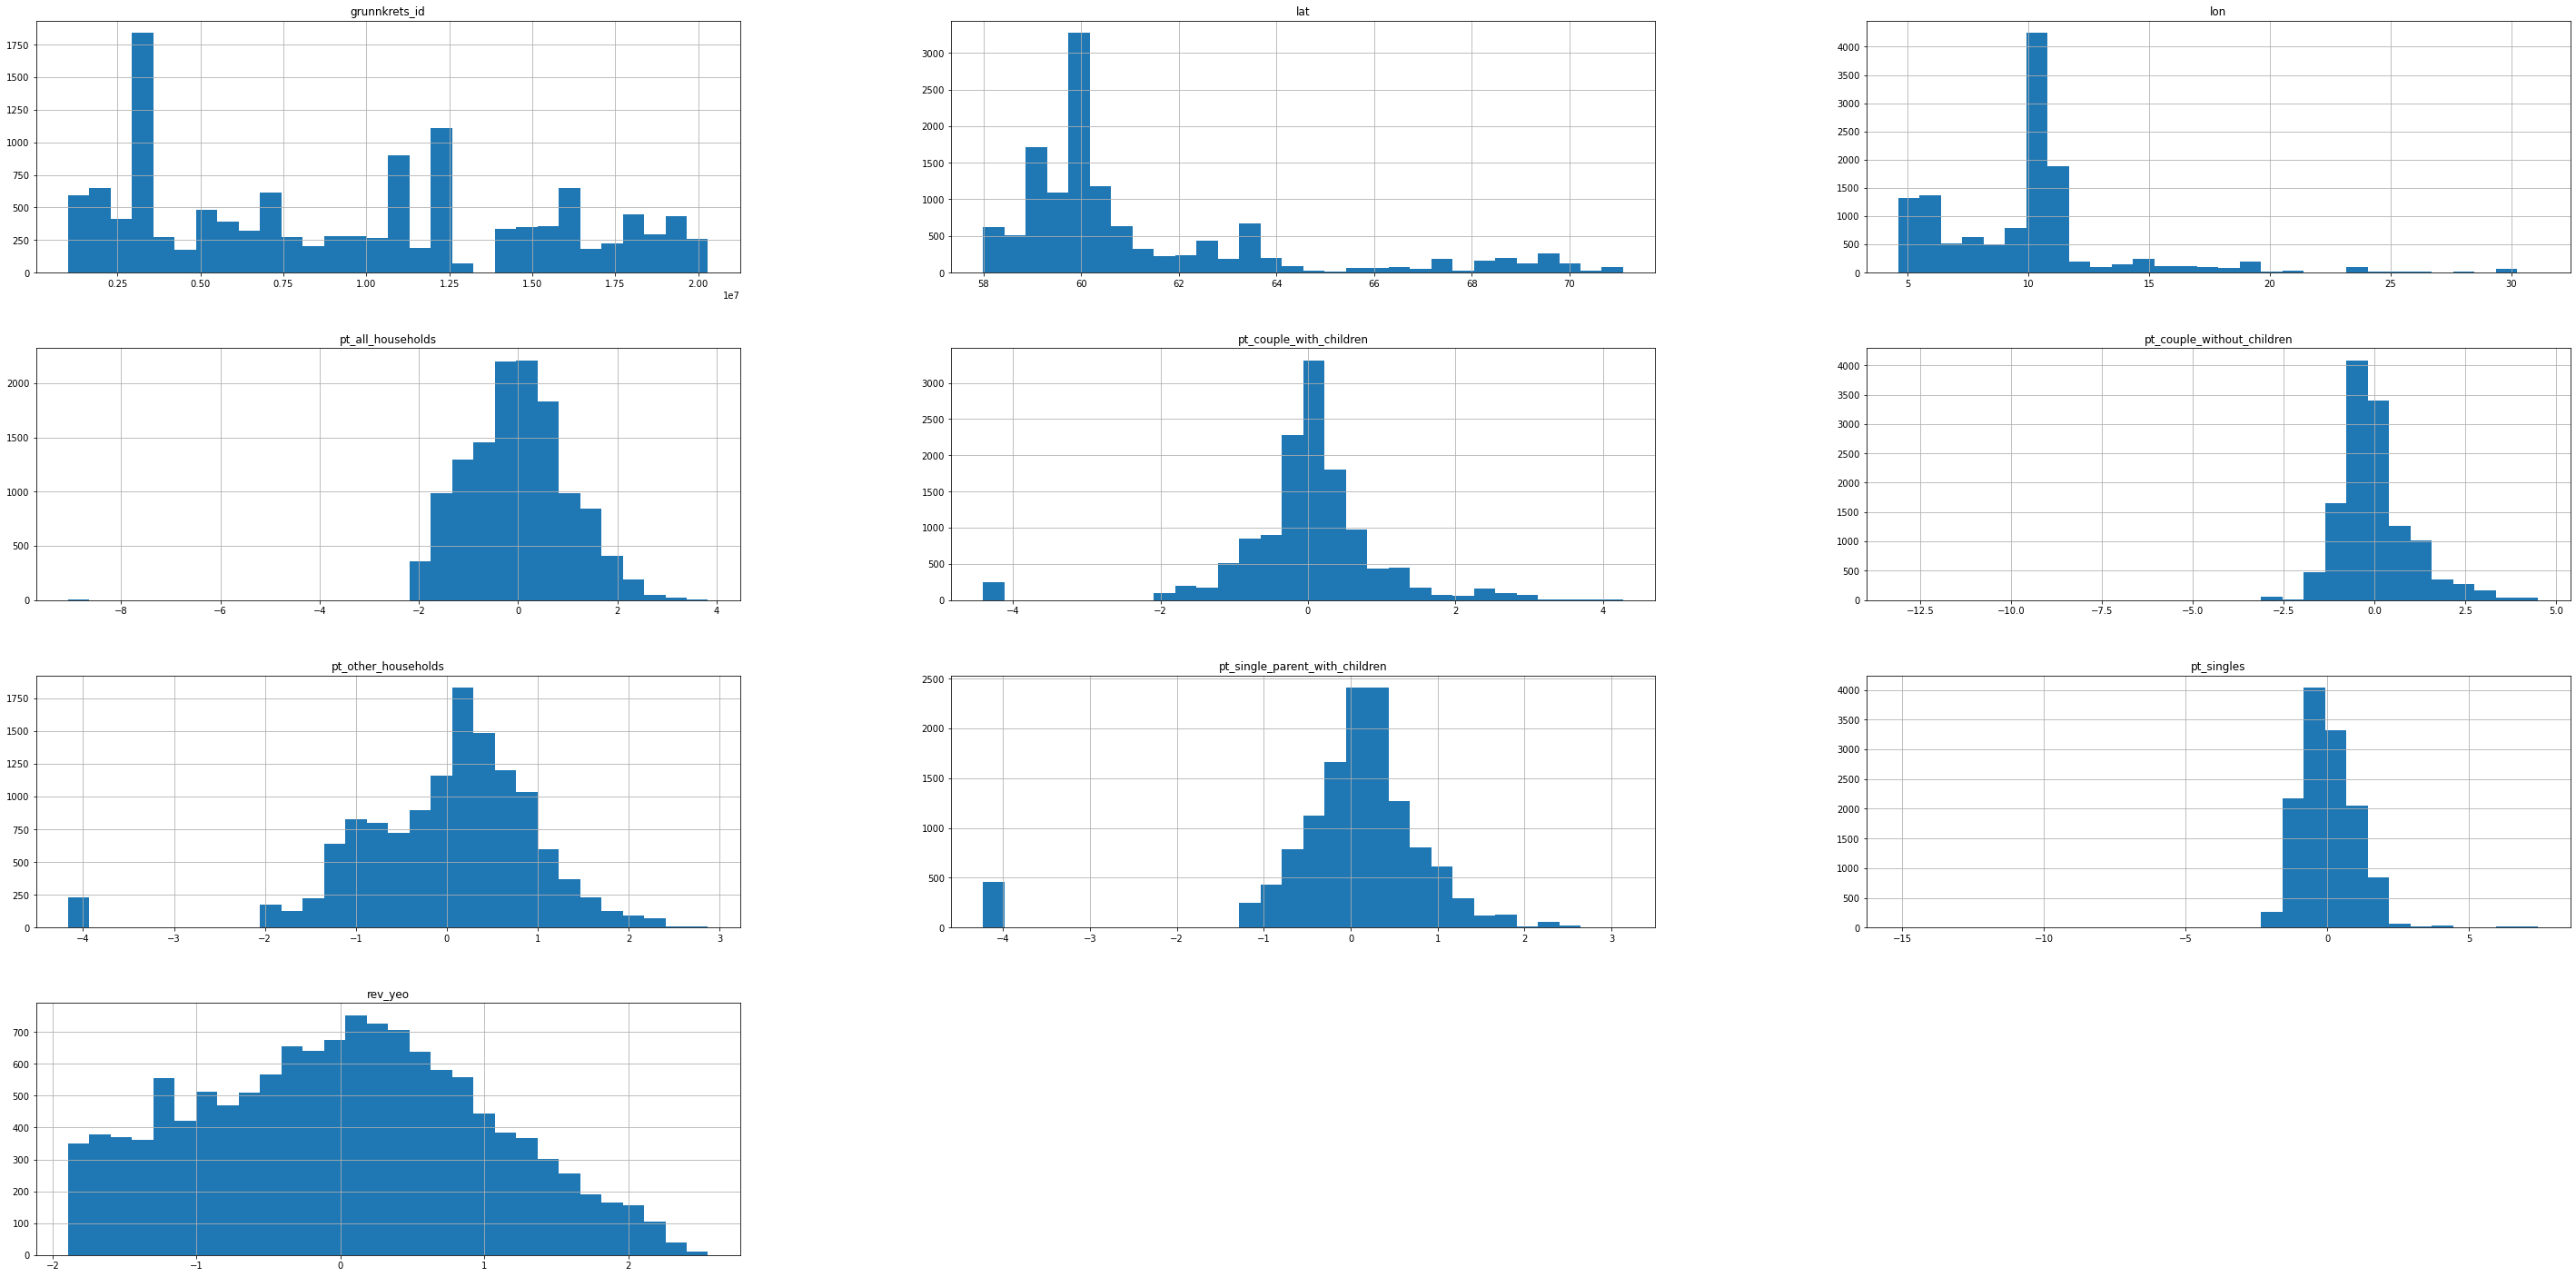

In [38]:
df_x.hist(bins=30, figsize = (50,25))